# Deterministic single zone example

"""
Example of creating a CDCM system  of a YABML
single zone deterministic building.

Author(s):
    Sreehari Manikkan

Date:
    06/22/2022
"""

We start with importing the required standard libraries, packages,
modules and functions. We import h5py which enables us to use hdf5 format
data storing while using python. We import YABML which is the in house building
description and modeling python package. We then import CDCM which is
the in house python package for modeling general dynamical systems.
From *building_system* module, we import *make_building_cdcm_system* function
which essentially outputs the CDCM system corresponding to the YABML
building object given. We import the *single_zone_building* which is a
fully determinstic YABML building object from the *single_zone_deterministic*
module.

In [1]:
import h5py
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yabml import *
from cdcm import *

from building_system import make_building_cdcm_system
from single_zone_deterministic import single_zone_building

Next we create a panda dataframe -- df from the weather_data_2017_pandas.csv file. This csv file contains weather data
of 2017. Using the dataframe, a CDCM data system called *weather_sys* is created by calling the *make_data_system* function available in CDCM.

In [2]:
df = pd.read_csv("./rc_system_data/weather_data_2017_pandas.csv")
def get_weather_sys(df):
    weather_sys = make_data_system(
        df[["Tout", "Qsg", "Qint"]],
        name="weather_sys",
        column_units=["degC", "Wh", "Wh"],
        column_desciptions=[
            "Outdoor air temperature",
            "Solar irradiance",
            "Internal heat gain"
        ]
    )
    return weather_sys

We create a CDCM clock system called *clock* with time step = 1800s. CDCM system called *building_system* corresponding to the *single_zone_building* is created by passing the yabml building object, weather data system and the clock system to make_building_cdcm_system() function.<br><br>
We then create a CDCM SimulationSaver object called test1_saver which will save the simulation results when simulation is run to the file test1_building.h5. We run the simulation by calling the forward() and tranistion() functions of the *building_system* inside a for loop till the maximum step given is reached.

In [3]:
clock = make_clock(1800)
building_system = make_building_cdcm_system(single_zone_building,
                                            get_weather_sys(df),
                                            clock)[0]
max_steps = 1000
file_name = "test1_building.h5"

if os.path.exists(file_name):
        os.remove(file_name)

test1_saver = SimulationSaver(file_name,
                            building_system,
                            max_steps=max_steps
)

for i in range(max_steps):
    building_system.forward()
    test1_saver.save()
    building_system.transition()

['Tout' 'Qsg' 'Qint'] ['degC', 'Wh', 'Wh'] ['Outdoor air temperature', 'Solar irradiance', 'Internal heat gain'] (True, True, True)
z, n <class 'yabml._zone.Zone'> <class 'numpy.ndarray'> [0 0 0 0 0 0]


We have completed the simulation and saving the results. Now let us plot some results. We fetch simulated results using the SimulationSaver object *test1_saver*. By giving the path of the variable of interest, the SimulationSaver object will give us the numpy array of the simulation results. We can plot and visualize these numpy arrays using matplotlib library.

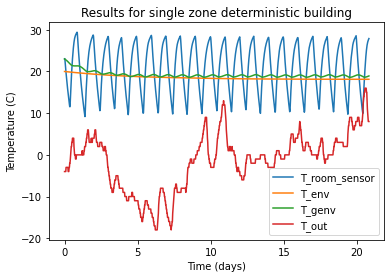

In [4]:
T_room_sensor = (
    test1_saver.file_handler[
        "/zone_cdcm_system/zone_rc_sys/T_room_sensor"
    ][:]
)
T_env = (
    test1_saver.file_handler["/zone_cdcm_system/zone_rc_sys/T_env"][:]
)
T_genv = (
    test1_saver.file_handler["/zone_cdcm_system/zone_rc_sys/T_genv"][:]
)
T_out = (
    test1_saver.file_handler["/zone_cdcm_system/weather_sys/Tout"][:]
)

time = np.arange(max_steps) * 0.5/24
plt.plot(time, T_room_sensor, label='T_room_sensor')
plt.plot(time, T_env, label='T_env')
plt.plot(time, T_genv, label='T_genv')
plt.plot(time, T_out, label='T_out')
plt.ylabel('Temperature (C)')
plt.xlabel('Time (days)')
plt.title('Results for single zone deterministic building')
plt.legend()
plt.show()